In [130]:
import matplotlib.pyplot as plt
import matplotlib
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # window용 # 안넣으면 한글 깨짐
matplotlib.rcParams['font.size'] = 15 # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False # 특수기호 (-) 출력
# matplotlib.rcParams['font.family'] = 'AppleGothic'   # Mac용
import pandas as pd
import numpy as np

In [131]:
df = pd.read_csv('drinks.csv')
df.columns
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [ ]:
# total_servings 컬럼 추가 생성 후, 대륙별 total_servings 를 원그래프로 출력

In [132]:
df['total_servings'] = df['beer_servings']+df['spirit_servings']+df['wine_servings']

In [30]:
filt = df.groupby('continent')['total_servings'].count()

([<matplotlib.patches.Wedge at 0x268184512b0>,
 [Text(0.6132383295710645, 0.9132024699621057, ''),
  Text(-1.0257194997154064, 0.3973657105281941, ''),
  Text(-0.32052848156630326, -1.0522649345601136, ''),
  Text(0.8129099856298609, -0.7410650141946113, ''),
  Text(1.073063246305278, -0.24194063203351873, '')],
 [Text(0.3902425733634046, 0.58112884452134, '31.2%'),
  Text(-0.6527305907279858, 0.25286908851794165, '25.9%'),
  Text(-0.2039726700876475, -0.6696231401746177, '26.5%'),
  Text(0.5173063544917297, -0.4715868272147526, '9.4%'),
  Text(0.682858429466995, -0.15396222038496643, '7.1%')])

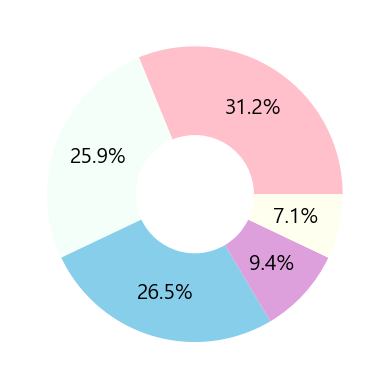

In [59]:

wedgeprops = {'width':0.6}
colors = ['pink','mintcream','skyblue','plum','ivory']

def custom_autopct(pct):
  return f'{pct:.1f}%' if pct >= 5 else ''

plt.pie(filt,autopct=custom_autopct,wedgeprops=wedgeprops,pctdistance=0.7,colors=colors)

# 선생님이 한것
* total_servings 컬럼 추가 생성 후, 대륙별 total_servings 를 원그래프로 출력


In [98]:
df['continent'].fillna('OT',inplace=True) # NaN -> 'OT' 로 채우기

C:\Users\KOSMO\AppData\Local\Temp\ipykernel_1352\536448273.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['continent'].fillna('OT',inplace=True) # NaN -> 'OT' 로 채우기


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [99]:
df['total_servings'] = df['beer_servings']+df['spirit_servings']+df['wine_servings']
df.head()


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319


In [100]:
df.groupby('continent')['total_servings'].value_counts()

# 대륙별 술 총 소비량 합계
c_df = df.groupby('continent')['total_servings'].sum()

# 대륙별 나라 개수
df['continent'].value_counts()

# df['continent'].unique() # 중복없이 개수만 # 하지만 순서가 달라서 그래프에는 사용하기 어려움

continent
AF    53
EU    45
AS    44
OT    23
OC    16
SA    12
Name: count, dtype: int64

In [104]:
c_df.index

Index(['AF', 'AS', 'EU', 'OC', 'OT', 'SA'], dtype='object', name='continent')

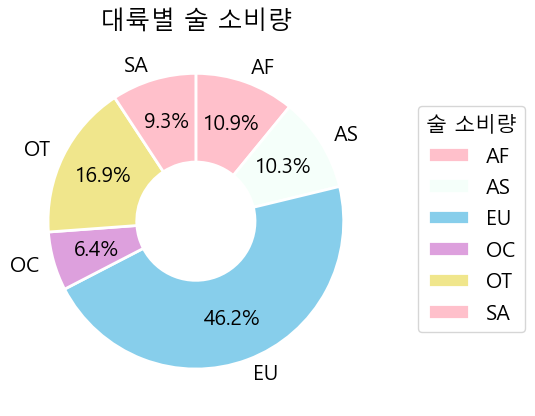

In [75]:
colors = ['pink','mintcream','skyblue','plum','khaki']
wedgeprops={'width':0.6,'edgecolor':'white','linewidth':2}
plt.title('대륙별 술 소비량')
plt.pie(c_df,labels=c_df.index,autopct='%.1f%%',startangle=90,counterclock=False, \
        colors=colors,wedgeprops=wedgeprops,pctdistance=0.7)
plt.legend(loc=(1.1,0.2),title='술 소비량')
plt.show()

In [77]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent', 'total_servings'],
      dtype='object')

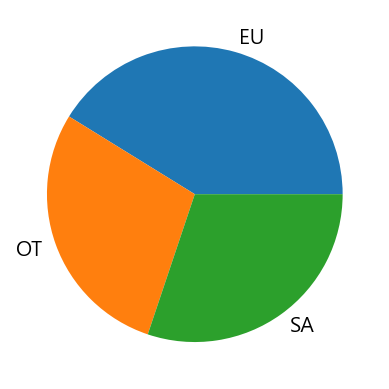

In [ ]:
### 전체 평균보다 많은 알코올 도수를 섭취하는 대륙 출력
# 1. 전체 평균 도수 구하기
data = df['total_litres_of_pure_alcohol'].mean() # 전체 평균 도수

# 2. 대륙별 평균 도수 구하기
total_df= df.groupby('continent')['total_litres_of_pure_alcohol'].mean() # 대륙별 도수 평균

# 3. 필터구하기
filt = total_df>data
# 4. 필터 적용해서 출력
total_df[filt]


# 내가한것ㅋㅎㅋ
# def func(x):
#   if filt2 > filt:
#     return filt2
#   else: ''

plt.pie(total_df[filt],labels=total_df[filt].index)
plt.show()

In [ ]:
# 평균 beer_servings이 가장 높은 대륙
df.groupby('continent')['beer_servings'].mean().sort_values(ascending=False).head(1).index # idx 출력
df.groupby('continent')['beer_servings'].mean().idxmax() # idx 출력
df.groupby('continent')['beer_servings'].mean().sort_values(ascending=False).head(1) # index 에 해당되는 value 출력
df.groupby('continent')['beer_servings'].mean().max() # index 에 해당되는 value 출력

np.float64(193.77777777777777)

In [ ]:
# 쌤이 하신것



## 대륙별 total_litres_of_pure_alcohol 막대그래프로 출력하시오.
## 마지막에는 평균 막대그래프를 출력하시오.
# 1. 전체 total_litres_of_pure_alcohol 평균을 구하기
data = df['total_litres_of_pure_alcohol'].mean()
n_data = [data]*6
# 2. 대륙별 total_litres_of_pure_alcohol 평균을 구하기
# 'AF', 'AS', 'EU', 'OC', 'OT', 'SA'
con_df = df.groupby('continent')['total_litres_of_pure_alcohol'].mean()
con_df
# 3. 컬럼에 대륙별 평균을 추가하기 mean
con_df['mean'] = data
# 4. 막대그래프를 출력
con_bar = plt.bar(con_df.index,con_df)
plt.plot(con_df.index,[data]*7,ls="--",color='black')
plt.grid(axis='y',ls='--',alpha=0.5)  # 격자선
# con_bar[len(con_df)-1].set_color('red')
con_bar[len(con_df)-1].set_color('red')

In [ ]:
# 대륙별 total_litres_of_pure_alcohol 를 막대그래프로 출력
# '대륙별 평균' 막대그래프도 출력('대륙별 평균' 컬럼 추가)
# 1. 전체 total_litres_of_pure_alcohol 평균
data = df['total_litres_of_pure_alcohol'].mean() # 전체 평균 도수
n_data = [data]*6
# 2. 대륙별 total_litres_of_pure_alcohol 평균
con_df = df.groupby('continent')['total_litres_of_pure_alcohol'].mean()
# 3. 대륙별 total_litres_of_pure_alcohol 평균 목록 뒤에 컬럼 '전체 평균' 추가
con_df['Mean'] = data
# con_df.index
# 4. 막대그래프 출력
con_bar = plt.bar(con_df.index,con_df)
plt.plot(total_df.index,[data]*7,ls='--',color='black')
plt.grid(axis='y',ls='--',alpha=0.5) # 격자선
con_bar[len(con_df)-1].set_color('red')


In [ ]:
x = total_df.index
y = [data]*6
plt.plot(x,y)

Index(['AF', 'AS', 'EU', 'OC', 'OT', 'SA'], dtype='object', name='continent')